<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random

In [3]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

100%|██████████| 1.03G/1.03G [00:10<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [4]:
# Listing the directories in the path in a list

dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_test', 'asl_alphabet_train']


In [5]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("Classes in dataset:", classes)
print("Total classes:", len(classes))

Classes in dataset: ['V', 'Q', 'Z', 'del', 'H', 'L', 'R', 'nothing', 'S', 'A', 'P', 'D', 'Y', 'W', 'U', 'O', 'space', 'X', 'N', 'T', 'B', 'M', 'E', 'C', 'I', 'G', 'F', 'K', 'J']
Total classes: 29


In [6]:
# Listing the classes in asl_alphabet_test

train_path = os.path.join(dataset_path, "asl_alphabet_test" , "asl_alphabet_test")
clas = os.listdir(train_path)

print("Classes in dataset:", clas)
print("Total classes:", len(clas))

Classes in dataset: ['J_test.jpg', 'S_test.jpg', 'T_test.jpg', 'C_test.jpg', 'H_test.jpg', 'Z_test.jpg', 'X_test.jpg', 'L_test.jpg', 'F_test.jpg', 'W_test.jpg', 'Y_test.jpg', 'G_test.jpg', 'A_test.jpg', 'M_test.jpg', 'D_test.jpg', 'U_test.jpg', 'nothing_test.jpg', 'V_test.jpg', 'K_test.jpg', 'Q_test.jpg', 'R_test.jpg', 'P_test.jpg', 'N_test.jpg', 'O_test.jpg', 'space_test.jpg', 'I_test.jpg', 'B_test.jpg', 'E_test.jpg']
Total classes: 28


/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/C/C1703.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/Y/Y952.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/L/L2433.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/W/W1713.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/N/N2612.jpg


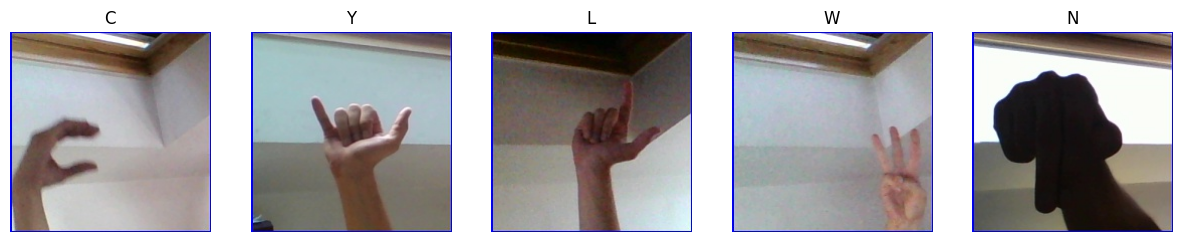

In [7]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [8]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # Progress bar for large datasets

# Define paths
input_dir = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding (adaptive for better hand detection)
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [00:43<00:00,  1.50s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [9]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['V', 'Q', 'Z', 'del', 'H', 'L', 'R', 'nothing', 'S', 'A', 'P', 'D', 'Y', 'W', 'U', 'O', 'space', 'X', 'N', 'T', 'B', 'M', 'E', 'C', 'I', 'G', 'F', 'K', 'J']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/F/F1888.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/S/S801.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/W/W2813.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/H/H1041.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/V/V1249.jpg


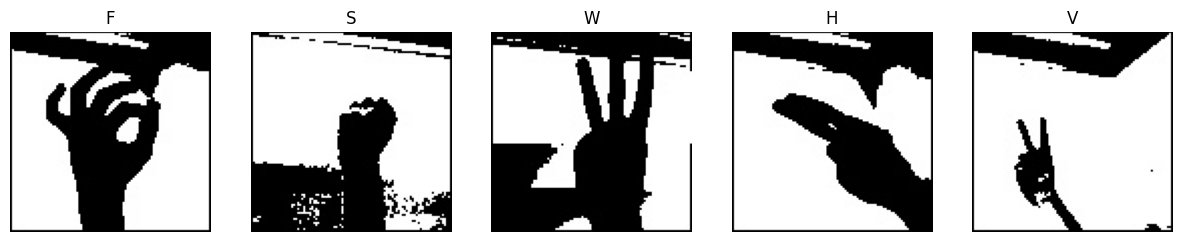

In [10]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)